#### Import the required libraries

In [1]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# type your code here
df = pd.read_csv('rainfall_prediction.csv')
df.head()

,Obs_Id,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
0,1,3.6,1.0,3.0,14.225,12.333333,82.0,1028.10,0
1,2,0.0,7.2,4.9,23.075,44.333333,69.5,1015.65,1
2,3,0.0,0.6,1.5,10.175,16.666667,87.0,1026.45,0
3,4,0.8,2.4,0.5,19.000,42.666667,89.0,1010.05,1
4,5,40.4,3.0,3.6,18.725,35.333333,81.5,1005.60,0


In [3]:
df.shape

(1520, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Obs_Id        1520 non-null   int64  
 1   Rainfall      1520 non-null   float64
 2   Evaporation   1520 non-null   float64
 3   Sunshine      1520 non-null   float64
 4   Temp          1520 non-null   float64
 5   Wind_Speed    1520 non-null   float64
 6   Humidity      1520 non-null   float64
 7   Pressure      1520 non-null   float64
 8   RainTomorrow  1520 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 107.0 KB


In [5]:
df['RainTomorrow'].astype('object')

0       0
1       1
2       0
3       1
4       0
       ..
1515    0
1516    0
1517    0
1518    0
1519    0
Name: RainTomorrow, Length: 1520, dtype: object

**The data definition is as follows:** <br>

**Obs_Id:** Observation Id

**Rainfall:** Rainfall recorded in a day (in mm) 

**Evaporation:** Number of field goals made 

**Sunshine:** Number of hours of bright sunshine per day

**Temp:** Temperature in degree C

**Wind_Speed:** Average speed of the wind in km/hour

**Humidity:** Humidity in percentage (%)

**Pressure:** Atmospheric pressure in hpa (hecto Pascals)

**Rain Tomorrow:** Whether it will rain or not(0 = No, it won't rain tomorrow, 1 = Yes, it will rain tomorrow) (target/dependent variable)

Our objective is to predict whether it will rain tomorrow or not.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify and remove the variables in the data which are insignificant for the classification analysis</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# type your code here
df.drop('Obs_Id',axis=1,inplace=True)

In [7]:
df2 = df.drop('RainTomorrow',axis=1)

In [8]:
df2.std()

Rainfall        7.322329
Evaporation     3.639993
Sunshine        3.689090
Temp            6.380897
Wind_Speed      8.653705
Humidity       17.939610
Pressure        6.958099
dtype: float64

In [9]:
df2.skew()

Rainfall       6.936253
Evaporation    1.271085
Sunshine      -0.604139
Temp           0.093545
Wind_Speed     0.794314
Humidity      -0.355121
Pressure      -0.073358
dtype: float64

In [10]:
cols = df2.columns

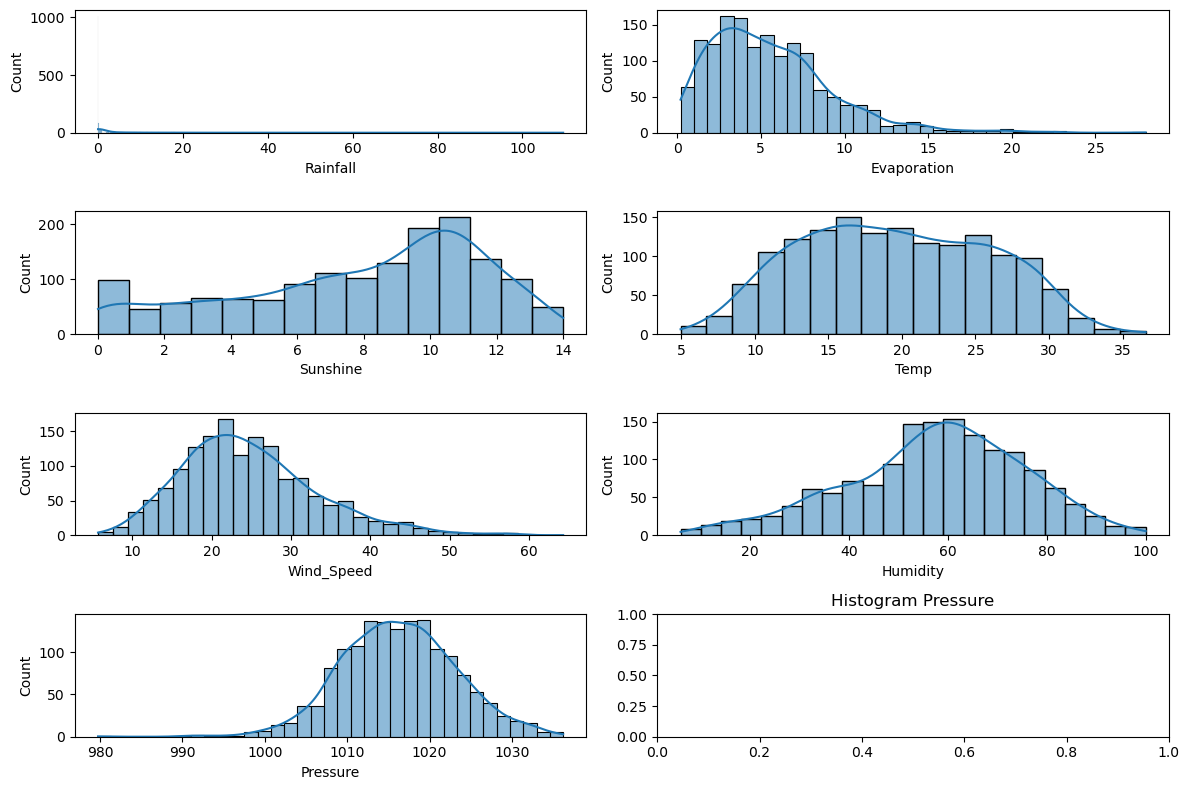

In [11]:
fig, ax= plt.subplots(4,2, figsize=(12,8))

for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df2[i], ax=subplot,kde=True)
    plt.title(f'Histogram {i}')

plt.tight_layout()
plt.show()

<Axes: >

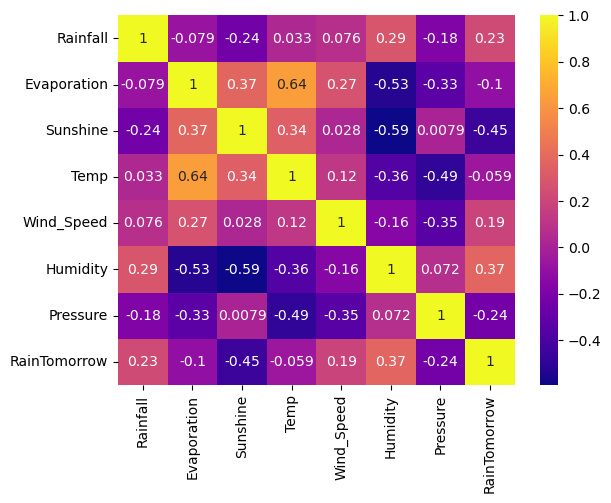

In [12]:
## Heatmap

sns.heatmap(df.corr(),annot=True,cmap='plasma')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there any record that is recorded more than once? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
print('Number of duplicated records = ',df.duplicated().sum())

Number of duplicated records =  20


In [14]:
df.drop_duplicates(keep='first', inplace=True)

In [15]:
df.shape

(1500, 8)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any outliers present in the data? If yes, remove such observations using the quartiles of the variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here

num = df.drop('RainTomorrow',axis=1)

In [17]:
### Checking the skewness of the variables
num.skew()

Rainfall       6.904418
Evaporation    1.269416
Sunshine      -0.606127
Temp           0.085246
Wind_Speed     0.787795
Humidity      -0.350441
Pressure      -0.077267
dtype: float64

In [18]:
### IQR method

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3 - q1

ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr

df2 = df[~((df < ll) | (df > ul)).any(axis = 1)]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is scaling required for the KNN algorithm? If yes, scale the data such that the range of each variable will be between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Scaling is typically required for the KNN algorithm because if the features have different scales, certain features with larger magnitudes may dominate the distance calculations, leading to biased results. 

In [31]:
x = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

<Axes: xlabel='RainTomorrow', ylabel='count'>

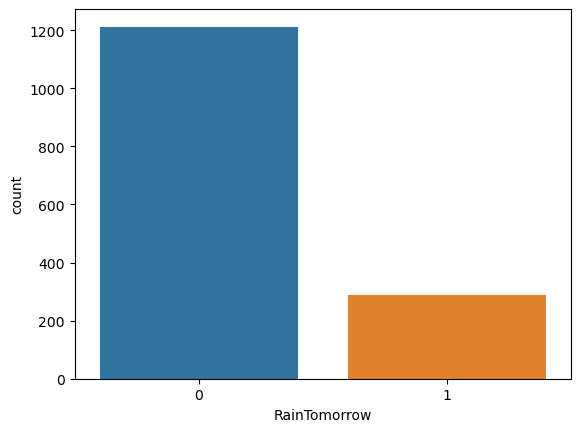

In [32]:
sns.countplot(x=y)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=50)

In [35]:
# type your code here
from sklearn.preprocessing import MinMaxScaler ## Since the required values should like between 0 and 1

In [36]:
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a 7-NN model on 70% of the data using the 'Chebyshev' distance and find its accuracy 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# type your code here
from sklearn.neighbors import KNeighborsClassifier

In [38]:
KNN = KNeighborsClassifier(n_neighbors=7,metric='chebyshev')

In [39]:
knn_model = KNN.fit(x_train,y_train)

knn_pred = knn_model.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [41]:
print('KNN model accuracy with 7 neighbours  = ',accuracy_score(y_test,knn_pred))

KNN model accuracy with 7 neighbours  =  0.8266666666666667


In [42]:
confusion_matrix(y_test,knn_pred)

array([[334,  22],
       [ 56,  38]], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the best value of 'K' for the KNN model from the given list of values (use 5-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

K = [3, 5, 7, 9, 11, 13]

In [43]:
# type your code here
from sklearn.model_selection import KFold,GridSearchCV

knn_grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                               param_grid ={'n_neighbors':[3, 5, 7, 9, 11, 13]},
                               cv =5,scoring='accuracy')

In [44]:
knn_grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13]},
             scoring='accuracy')

In [45]:
knn_grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=13)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a naive bayes model on 70% of the original data and plot the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# type your code here
from sklearn.naive_bayes import GaussianNB

In [47]:
NB = GaussianNB()

In [48]:
nb_model = NB.fit(x_train,y_train)
nb_pred = nb_model.predict(x_test)

In [49]:
accuracy_score(y_test,nb_pred)

0.8222222222222222

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       356
           1       0.58      0.53      0.56        94

    accuracy                           0.82       450
   macro avg       0.73      0.72      0.72       450
weighted avg       0.82      0.82      0.82       450



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which distance metric among 'manhattan', 'euclidean' and 'chebyshev' is suitable for the given dataset? (consider K = 19)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
# type your code here
knn_grid_dist = GridSearchCV(estimator = KNeighborsClassifier(),
                               param_grid ={'n_neighbors':[19],'metric':['manhattan','euclidean','chebyshev']},
                               cv =5,scoring='accuracy')

In [55]:
knn_grid_dist.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'n_neighbors': [19]},
             scoring='accuracy')

In [56]:
knn_grid_dist.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=19)

### From the GridSearchCV,  for 19 neighbours, Manhattan distance is the best distance metric.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the euclidean distance between the first observation of the dataframe 'X_test_scaled' and its five neighboring points in the train set (use for loop)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
# type your code here
x_test

array([[0.00547445, 0.34532374, 0.47857143, ..., 0.63636364, 0.55080214,
        0.51107174],
       [0.        , 0.13669065, 0.56428571, ..., 0.3125    , 0.5828877 ,
        0.75022143],
       [0.        , 0.17266187, 0.64285714, ..., 0.38068182, 0.60962567,
        0.63773251],
       ...,
       [0.09306569, 0.15107914, 0.01428571, ..., 0.47159091, 0.93582888,
        0.61027458],
       [0.02372263, 0.07194245, 0.        , ..., 0.30113636, 0.82352941,
        0.38441098],
       [0.        , 0.07913669, 0.33571429, ..., 0.48295455, 0.64705882,
        0.57661647]])

In [60]:
from scipy.spatial.distance import euclidean

In [66]:
test_obs = x_test[0]

In [70]:
indices = []
distances = []

for i in range(5):
    train_obs = x_train[i]
    distance = euclidean(test_obs, train_obs)
    distances.append(distance)
    indices.append(i)

print("Distances:", distances)
print("Neighbor Indices:", indices)

Distances: [0.6034116358077074, 0.47835381928159854, 0.43782996088027676, 0.557998097101974, 0.8287420088084949]
Neighbor Indices: [0, 1, 2, 3, 4]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the parameters obtained in Q8 to build the KNN model, and find the number of false predictions using the test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [71]:
# type your code here

KNN = KNeighborsClassifier(metric='manhattan', n_neighbors=19)

knn_grid_model = KNN.fit(x_train,y_train)
knn_grid_pred = knn_grid_model.predict(x_test)

In [72]:
accuracy_score(y_test,knn_grid_pred)

0.8288888888888889

In [73]:
print(classification_report(y_test,knn_grid_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       356
           1       0.66      0.37      0.48        94

    accuracy                           0.83       450
   macro avg       0.76      0.66      0.69       450
weighted avg       0.81      0.83      0.81       450



In [74]:
confusion_matrix(y_test,knn_grid_pred)

array([[338,  18],
       [ 59,  35]], dtype=int64)

In [75]:
## From the confusion matrix
false_positive = 18
false_negative = 59

print('False Predictions = ',false_negative+false_positive)

False Predictions =  77
